<a href="https://colab.research.google.com/github/mrri-18/swu_2/blob/main/spcies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.datasets import load_iris
import numpy as np

iris_dataset=load_iris() #데이터 적재

In [ ]:
print("iris_dataset의 키:\n", iris_dataset.keys()) #DESCR: 설명

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print("타깃의 이름:", iris_dataset['target_names'])#분류하려는 품종 종류

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("특성의 이름:", iris_dataset['feature_names'])#sepal=꽃받침, petal=꽃잎

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("data 타입:",type(iris_dataset['data'])) #위 특성을 넘파이 배열로 가짐

data 타입: <class 'numpy.ndarray'>


In [ ]:
print("data의 크기:", iris_dataset['data'].shape) #150개의 꽃, 4개의 측정치 

data의 크기: (150, 4)


In [ ]:
print("data 배열의 처음 다섯 행: \n", iris_dataset['data'][:5])

data 배열의 처음 다섯 행: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("타깃:\n", iris_dataset['target'])  #샘플들 분류 결과 0~2로 분류

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
from sklearn.model_selection import train_test_split #train_test_split함수= 75%의 데이터=>train 세트로 랜덤하게 섞음
X_train, X_test, y_train, y_test=train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train 크기: ", X_train.shape)
print("Y_train 크기: ", y_train.shape)
print("X_test 크기: ", X_test.shape)
print("Y_test 크기: ", y_test.shape)


X_train 크기:  (112, 4)
Y_train 크기:  (112,)
X_test 크기:  (38, 4)
Y_test 크기:  (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3ec6f2a10>,
      dtype=object)

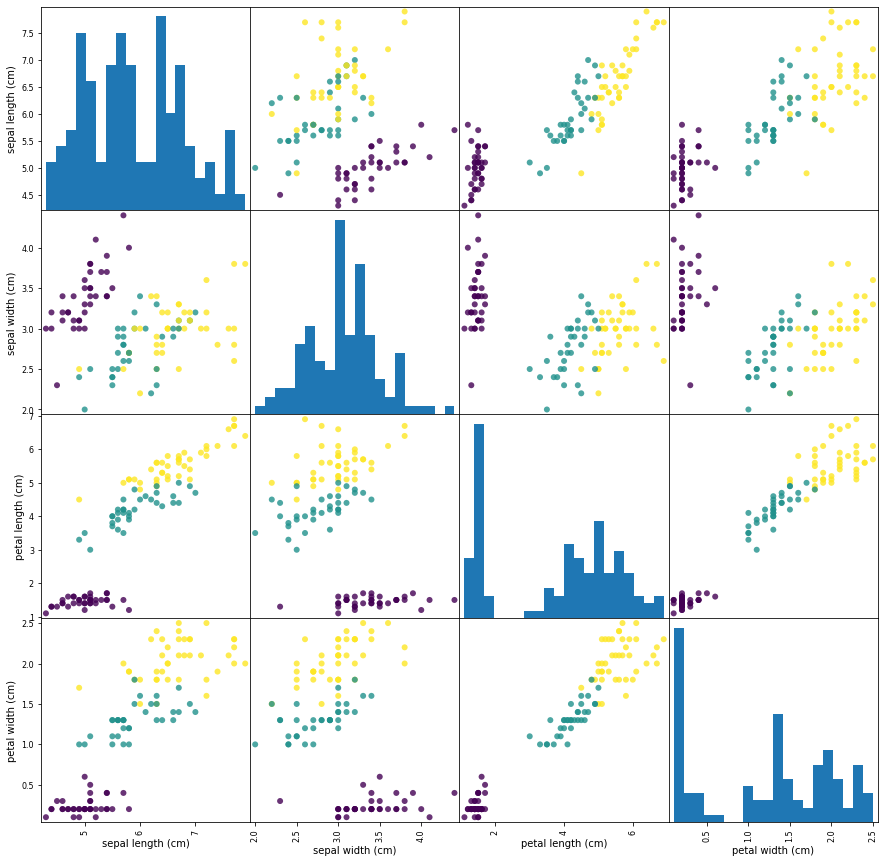

In [12]:
import pandas as pd
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                           hist_kwds={'bins':20},  alpha=.8) #세 클래스가 구분되는 것을 볼 수 있다


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1) #이웃의 개수를 1로 지정


In [14]:
knn.fit(X_train, y_train)#knn객체 반환

KNeighborsClassifier(n_neighbors=1)

In [17]:
X_new=np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: ", X_new.shape) #새 데이터를 2차원 배열로 만듦 ∵사이킷런은 항상 2차원 배열일 것으로 예상

X_new.shape:  (1, 4)


In [18]:
prediction=knn.predict(X_new)
print("예측", prediction)
print("예측한 타깃의 이름: ", 
      iris_dataset['target_names'][prediction]) #target 번호0인 setosa라고 예측


예측 [0]
예측한 타깃의 이름:  ['setosa']


In [19]:
y_pred=knn.predict(X_test)
print("테스트 세트에 대한 예측값: ", y_pred)
print("정확도: {:.2f}".format(np.mean(y_pred==y_test))) #score함수를 가지고 test결과와 y_pred 비교

테스트 세트에 대한 예측값:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
정확도: 0.97
